In [1]:
import pandas as pd

In [3]:
train_df = pd.read_csv('train.csv')

#### 원 데이터 확인

In [4]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB


In [7]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [19]:
print(train_df.shape)

(55423856, 8)


In [20]:
print(train_df.dtypes)

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


#### 데이터의 겹침 유무

In [22]:
train_drop = train_df.drop_duplicates()

In [23]:
train_drop.shape #겹치는 거 없음

(55423856, 8)

#### 결측치 확인

In [24]:
train_df.isna()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
55423851,False,False,False,False,False,False,False,False
55423852,False,False,False,False,False,False,False,False
55423853,False,False,False,False,False,False,False,False
55423854,False,False,False,False,False,False,False,False


In [25]:
#결측치 제거
drop_df=train_df.dropna()

In [29]:
drop_df.shape

(55423480, 8)

In [32]:
drop_df.to_csv("drop_train.csv")

#### 시각화

In [9]:
import matplotlib.pyplot as plt

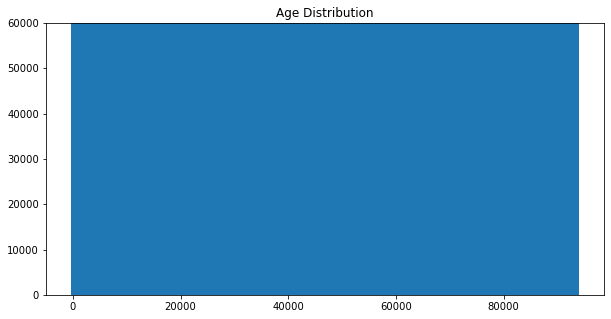

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(train_df['fare_amount'], bins=1)
ax.set_ylim(0, 60000)
ax.set_title('Age Distribution')
plt.show()

#?????????????

In [33]:
print(train_df.dtypes)

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [36]:
import numpy as np

In [37]:
numerical_feature = list(set(train_df.columns) - set('key') - set('pickup_datetime'))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['dropoff_latitude', 'dropoff_longitude', 'fare_amount', 'key',
       'passenger_count', 'pickup_datetime', 'pickup_latitude',
       'pickup_longitude'], dtype='<U17')

In [39]:
import seaborn as sns

<AxesSubplot:>

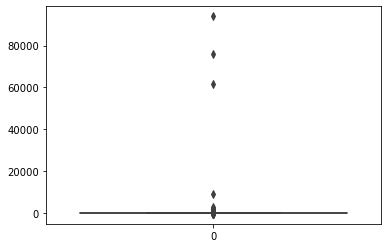

In [48]:
sns.boxplot(data=train_df['fare_amount'])

<AxesSubplot:>

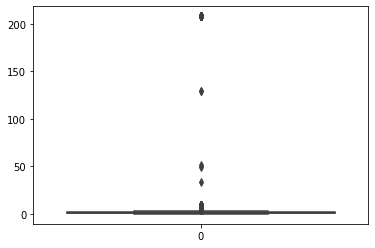

In [49]:
sns.boxplot(data=train_df['passenger_count'])

C:\Users\jisuj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


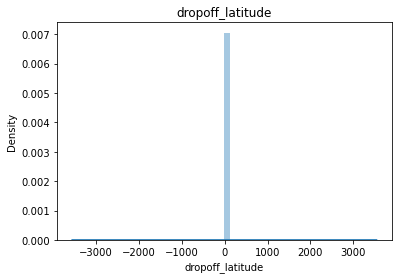

C:\Users\jisuj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyboardInterrupt: 

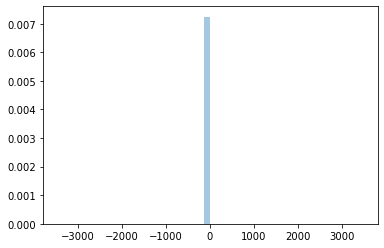

In [40]:
unique_list = train_df['passenger_count'].unique()
 
for col in numerical_feature:
    sns.distplot(train_df.loc[train_df[col].notnull(), col])
    plt.title(col)
    plt.show()

In [51]:
droped_df = pd.read_csv("drop_train.csv")

In [53]:
drop_sample1 = droped_df.sample(n=2000, replace =True)

In [62]:
drop_sample1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 37385561 to 43086906
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   key                2000 non-null   object 
 2   fare_amount        2000 non-null   float64
 3   pickup_datetime    2000 non-null   object 
 4   pickup_longitude   2000 non-null   float64
 5   pickup_latitude    2000 non-null   float64
 6   dropoff_longitude  2000 non-null   float64
 7   dropoff_latitude   2000 non-null   float64
 8   passenger_count    2000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 156.2+ KB


In [66]:
drop_sample1.drop(['Unnamed: 0'],axis=1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
37385561,2011-03-26 16:39:00.000000186,4.9,2011-03-26 16:39:00 UTC,-73.991203,40.749412,-73.989058,40.735453,5
19707678,2011-09-27 10:32:27.0000001,4.9,2011-09-27 10:32:27 UTC,-73.959021,40.763905,-73.964754,40.770185,1
46451150,2012-08-04 13:07:59.0000002,9.7,2012-08-04 13:07:59 UTC,-73.967287,40.803518,-73.992518,40.768613,1
8823583,2010-06-05 01:31:00.00000026,21.3,2010-06-05 01:31:00 UTC,-73.992322,40.724667,-73.876782,40.708285,5
54827500,2012-07-17 10:27:50.0000003,13.7,2012-07-17 10:27:50 UTC,-73.982811,40.766111,-73.981615,40.732749,1
...,...,...,...,...,...,...,...,...
2825916,2013-05-15 06:50:40.0000002,17.5,2013-05-15 06:50:40 UTC,-74.015157,40.710614,-73.983949,40.761922,1
28005602,2013-02-15 11:38:00.00000041,9.0,2013-02-15 11:38:00 UTC,-73.996007,40.726178,-73.987512,40.744915,2
29547534,2013-12-07 23:18:24.0000002,9.0,2013-12-07 23:18:24 UTC,-73.982710,40.766228,-73.990344,40.750469,1
12389372,2014-03-23 16:11:43.0000002,52.0,2014-03-23 16:11:43 UTC,-73.785845,40.647899,-73.981420,40.771185,1


<AxesSubplot:xlabel='pickup_longitude', ylabel='dropoff_longitude'>

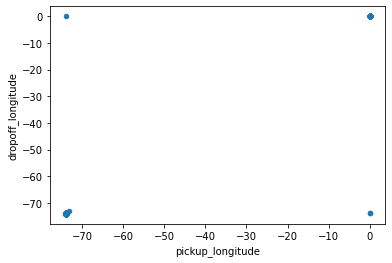

In [67]:
#태운경도, 내려준 경도
drop_sample1.plot.scatter('pickup_longitude','dropoff_longitude')

<AxesSubplot:xlabel='pickup_latitude', ylabel='dropoff_latitude'>

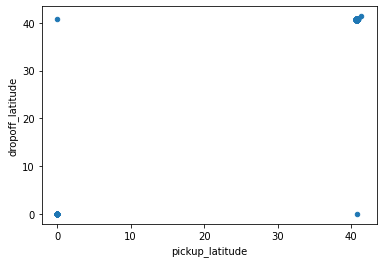

In [69]:
#태운 위도, 내려준 위도
drop_sample1.plot.scatter('pickup_latitude','dropoff_latitude')

In [70]:
### drop_df에서 fare_amount가 0이상이 아닌 것 빼기
print('Old size: %d' % len(droped_df))
droped_df_2 = droped_df[droped_df.fare_amount>=0]
print('New size: %d' % len(droped_df_2))

Old size: 55423480
New size: 55421026


In [ ]:
# 결측치 제거


# 이상치 제거


# 추가 변수 / 변수 전처리 생각까지만 !!!